- Price, G. R. (1970). Selection and covariance. Nature, 227, 520-521.
- Price, G. R. (1972). Fisher's ‘fundamental theorem’ made clear. Annals of human genetics, 36(2), 129-140.
- Price, G. R. (1972). Extension of covariance selection mathematics. Annals of human genetics, 35(4), 485-490.
- Gardner, A. (2020). Price's equation made clear. Philosophical Transactions of the Royal Society B, 375(1797), 20190361. https://doi.org/10.1098/rstb.2019.0361

# Price's equation

$\Delta E_{i \in I} (z_i) = \text{Cov}_{i \in I} (w_i, z_i) + E_{i \in I} (w_i \Delta z_i)$

- $w_i$: 個体 $i$ の適応度
- $z_i$: 個体 $i$ の特性値
- $\text{Cov}_{i \in I} (w_i, z_i)$: 適応度と特性値の共分散
- $E_{i \in I} (w_i \Delta z_i)$: 適応度によって重み付けされた特性の非選択的変動の期待値
- $\Delta E_{i \in I} (z_i)$: 特性の変化の平均値

# Evolution of Cooperation (Altruism)

## Assumption

1. 集団の中に協力する個体 ( $C$, $z = 1$ ) と協力しない個体 ( $D$, $z = 0$ ) の2種類の個体が存在する。
1. 全人口を $N$ とし、$C$ の人口を $N_C$、$D$ の人口を $N_D$ とする。($N = N_C + N_D$)
1. $C$ は、協力により他の個体の適応度を $b$ 増加させるが、自身の適応度は $c$ 減少する。($b, c \in \mathbb{R}$)
1. $D$ は、何もしない。
1. $C$ から協力を受け取る個体は無差別に選ばれる。

## Analytical solution

$C$ は、$c$ のコストを支払い、無差別に (人口比に応じた確率で) $b$ を受け取るので、$C$ の適応度の変化の期待値は

$\Delta w_C = \frac{N_C}{N} b - c$.

$D$ は、コストを支払わず、無差別に (人口比に応じた確率で) $b$ を受け取るので、$D$ の適応度の変化の期待値は

$\Delta w_D = \frac{N_C}{N} b$.

集団全体の適応度の変化の期待値は、

$$
\begin{aligned}
\bar{\Delta w} &= (\Delta w_C \times N_C + \Delta w_D \times N_D) / N \\
               &= \{(\frac{N_C}{N} b - c) N_C + \frac{N_C}{N} b N_D\} / N \\
               &= \frac{N_C}{N} (b - c)
\end{aligned}
$$

特性値の平均は、

$\bar{z} = \frac{N_C}{N}$.

適応度と特性値の共分散は、

$$
\begin{aligned}
\text{Cov}_{i \in I} (w_i, Z_i) &= (\Delta w_C − \bar{\Delta w})(z_C − \bar{z}) \times \frac{N_C}{N} + (\Delta w_D − \bar{\Delta w})(z_D − \bar{z}) \times \frac{N_D}{N} \\
                                &= \{\frac{N_C}{N} b - c - \frac{N_C}{N} (b - c)\} (1 - \frac{N_C}{N}) \frac{N_C}{N} +
                                   \{\frac{N_C}{N} b - \frac{N_C}{N} (b - c)\} (0 - \frac{N_C}{N}) \frac{N_D}{N} \\
                                &= -c \frac{N_C N_D}{N^2} \\
                                &= c \{(\frac{N_C}{N})^2 - \frac{N_C}{N}\} \\
                                &= c (\bar{z}^2 - \bar{z})
\end{aligned}
$$

となる。

非選択的変動については、特に仮定されていないため、$E_{i \in I} (w_i \Delta Z_i) = 0$ とする。

よって、協力的特性の頻度の変化量は、

$$
\begin{aligned}
\Delta E_{i \in I} (z_i) &= \text{Cov}_{i \in I} (w_i, z_i) + E_{i \in I} (w_i \Delta z_i) \\
          \Delta \bar{z} &= c (\bar{z}^2 - \bar{z})
\end{aligned}
$$

となる。

結果をグラフで表すと以下の様になる。

$c > 0$ の場合、(0, 0) は安定的(吸引的)な不動点で、(1, 0)は不安定な不動点となる。つまり、協力者の頻度は時間経過に伴って減っていく。

$c < 0$ の場合 (つまり協力をすれば得をするケース)、その関係が逆転し、協力者の頻度は時間経過に伴って増えていく。

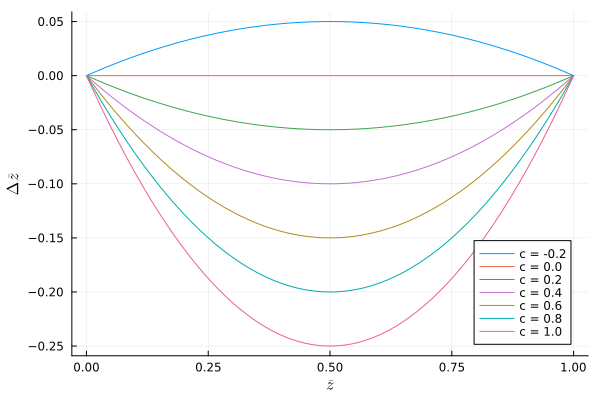

In [7]:
using Plots
using LaTeXStrings

c_vec = -0.2:0.2:1.0

p = plot(xlabel=L"\bar{z}", ylabel=L"\Delta \bar{z}")
for c in c_vec
    plot!(r -> c * (r^2 - r), 0, 1, label="c = $(c)")
end
display(p)

## Simulation

利得のやり取り (Assumption の 3 〜 5) をシミュレーションし、共分散を直接計算しても、上記の解析解を再現することができる。

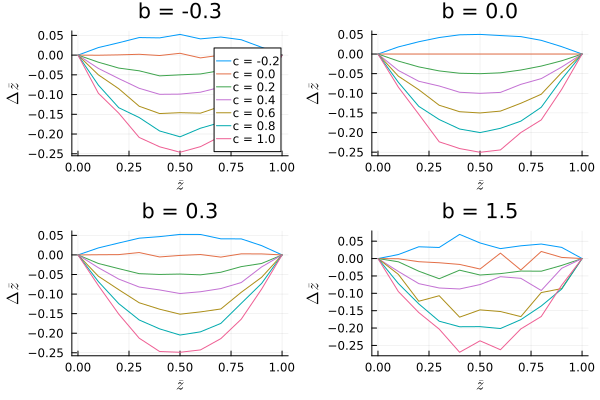

In [8]:
using Statistics: cov

function simulation(r::Float64, c::Float64, b::Float64, N::Int = 1_000)::Float64
    z_vec = [rand() < r ? 1 : 0 for x in 1:N]
    w_vec = fill(1.0, N)

    for i in 1:N
        if z_vec[i] == 1
            taker = rand([x for x in 1:N if x != i])
            w_vec[i] -= c
            w_vec[taker] += b
        end
    end

    return cov(w_vec, z_vec)
end

r_vec = 0.0:0.1:1.0
b_vec = [-0.3, 0.0, 0.3, 1.5]
p_vec = []

for b in b_vec
    p = plot(xlabel=L"\bar{z}", ylabel=L"\Delta \bar{z}", title = "b = $(b)", legend = b == -0.3)
    for c in c_vec
        ΔZ_vec = [simulation(r, c, b) for r in r_vec]
        plot!(r_vec, ΔZ_vec, label="c = $(c)")
    end
    push!(p_vec, p)
end

plot(p_vec..., layout = (2, 2))

解析解では $b$ の値は結果に影響しなかったが、シミュレーションでは、 $b$ の値が $c$ と比べて大きすぎると、相対的に $c$ の影響が小さくなり、結果が不安定になる。試行回数を増やせば、解析解に近づくだろう。